In [5]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [6]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [15]:
BAC = pd.read_csv('BAC.csv')                                      # Bank of America

In [18]:
C = pd.read_csv('C.csv')                                           # CitiGroup

In [21]:
GS = pd.read_csv('GS.csv')                                         # Goldman Sachs

In [23]:
JPM = pd.read_csv('JPM.csv')                                        # JPMorgan Chase

In [25]:
WFC = pd.read_csv('WFC.csv')                                      # Wells Fargo

In [27]:
MS = pd.read_csv('MS.csv')                                        # Morgan Stanley

In [31]:
df = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [32]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [33]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

** Set the column name levels (this is filled out for you):**

In [34]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [35]:
bank_stocks.head()

Bank Ticker         BAC                                              \
Stock Info         Date       Open       High        Low      Close   
0            2006-01-03  46.919998  47.180000  46.150002  47.080002   
1            2006-01-04  47.000000  47.240002  46.450001  46.580002   
2            2006-01-05  46.580002  46.830002  46.320000  46.639999   
3            2006-01-06  46.799999  46.910000  46.349998  46.570000   
4            2006-01-09  46.720001  46.970001  46.360001  46.599998   

Bank Ticker                                C                          ...  \
Stock Info   Adj Close    Volume        Date        Open        High  ...   
0            34.106041  16296700  2006-01-03  490.000000  493.799988  ...   
1            33.743816  17757900  2006-01-04  488.600006  491.000000  ...   
2            33.787266  14970700  2006-01-05  484.399994  487.799988  ...   
3            33.736572  12599800  2006-01-06  488.799988  489.000000  ...   
4            33.758297  15619400  2006-01-09  486.000000  487.399994  ...   

Bank Ticker         MS                             WFC                        \
Stock Info       Close  Adj Close   Volume        Date       Open       High   
0            58.310001  36.364140  5377000  2006-01-03  31.600000  31.975000   
1            58.349998  36.389069  7977800  2006-01-04  31.799999  31.820000   
2            58.509998  36.488869  5778000  2006-01-05  31.500000  31.555000   
3            58.570000  36.526283  6889800  2006-01-06  31.580000  31.775000   
4            59.189999  36.912933  4144500  2006-01-09  31.674999  31.825001   

Bank Ticker                                             
Stock Info         Low      Close  Adj Close    Volume  
0            31.195000  31.900000  20.523809  11016400  
1            31.365000  31.530001  20.285755  10870000  
2            31.309999  31.495001  20.263241  10158000  
3            31.385000  31.680000  20.382265   8403800  
4            31.555000  31.674999  20.379047   5619600  

[5 rows x 42 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [36]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [37]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [38]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
3,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
4,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

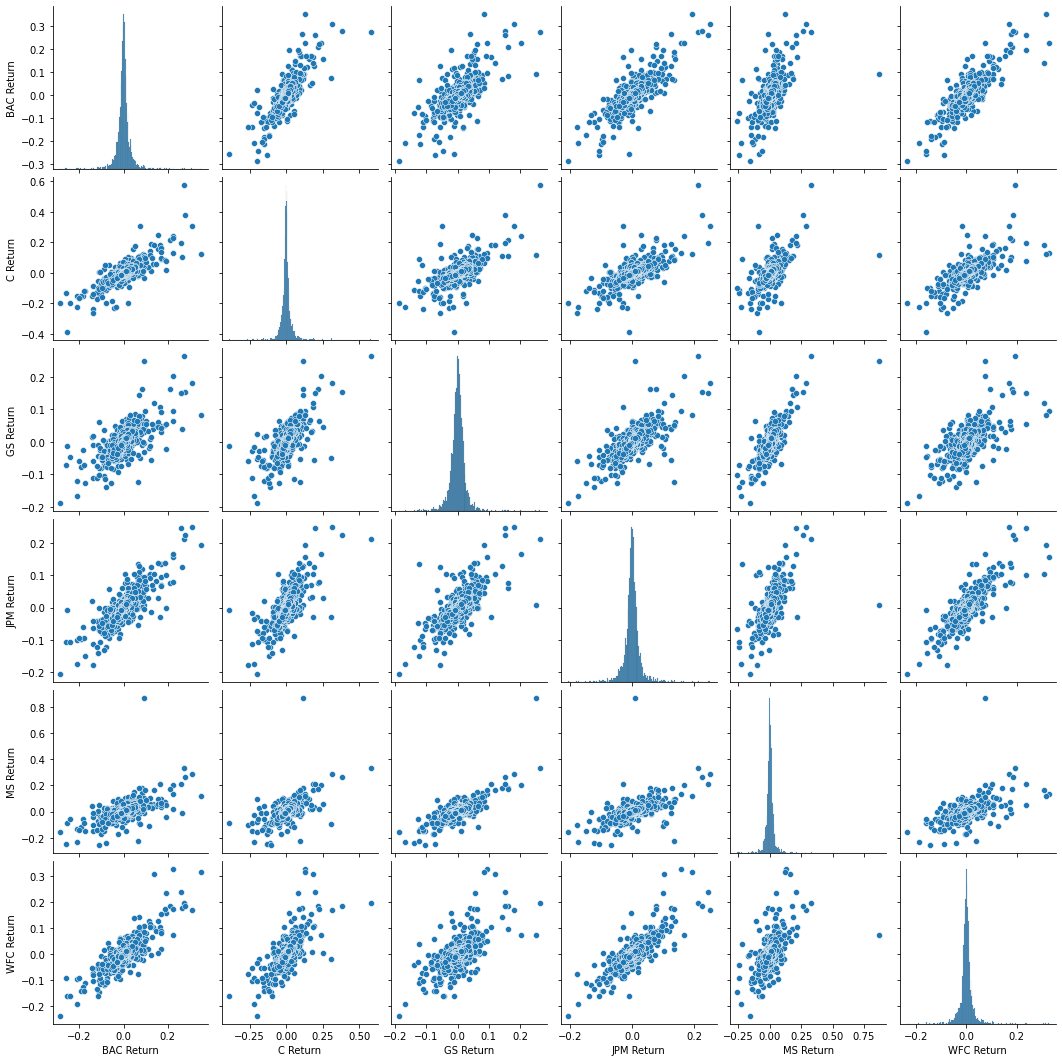

In [39]:
import seaborn as sns
sns.pairplot(returns[1:])

In [48]:
returns.idxmin()                                   # Worst Drop (4 of them on Inauguration day)

BAC Return    766
C Return      793
GS Return     766
JPM Return    766
MS Return     697
WFC Return    766
dtype: int64

In [49]:
returns.std()                                               # Citigroup was riskiest

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import plotly
import cufflinks as cf
cf.go_offline()

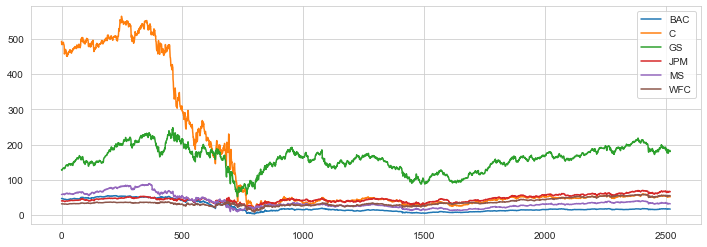

In [46]:
for tick in tickers:                                           # Close price for each bank for the entire index of time
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

<AxesSubplot:>

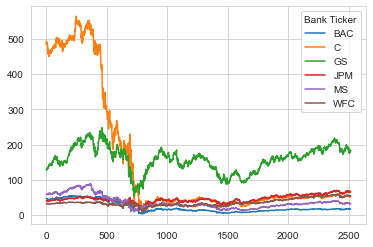

In [50]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [51]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()                      # plotly

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

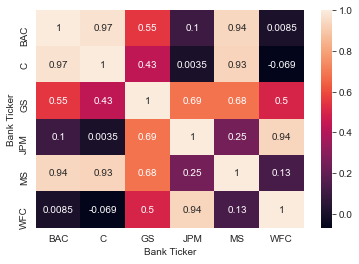

In [53]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)       #heatmap

** Optional: Use seaborn's clustermap to cluster the correlations together:**

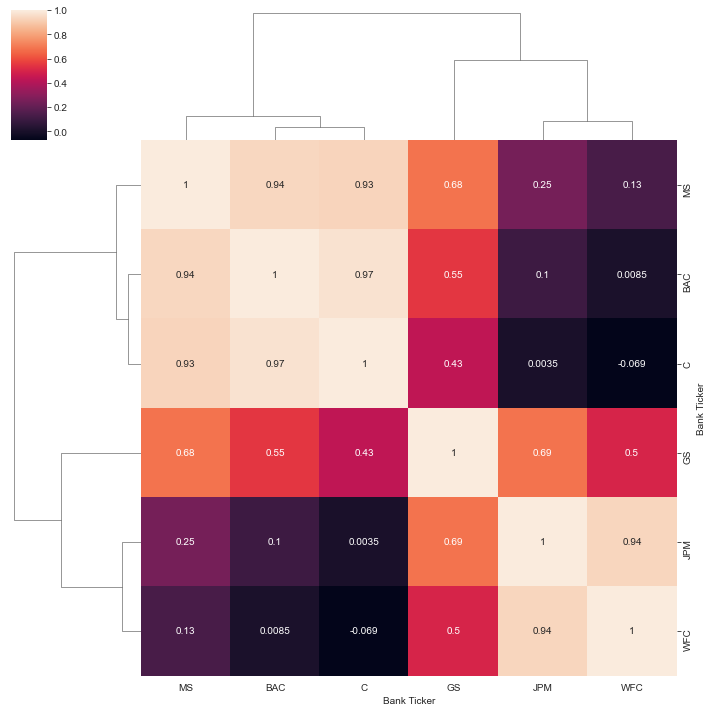

In [54]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [55]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')